# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

![image.png](attachment:image.png)

![image.png](attachment:image.png)

# TASK #2: IMPORT DATASETS AND LIBRARIES

In [ ]:
#!pip install fbprophet

In [ ]:
# !pip install plotly

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from fbprophet import Prophet
from sklearn.metrics import r2_score

In [2]:
# Import the data
# Entity: Country Name
# Date: Date on which records were observed
# Cases: Number of confirmed Covid-19 cases
# Deaths: Number of confirmed Covid-19 related deaths
# Daily tests: Number of tests taken in the country
# Iso_alpha: ISO code for countries
# Month: Month of observation

covid_df = pd.read_csv('/content/covid_data.csv')
covid_df.head()

Entity        Date  Cases  Deaths  Daily tests iso_alpha  month
0    Mexico  2020-01-01    0.0     0.0         25.0       MEX      1
1    Mexico  2020-01-02    0.0     0.0         72.0       MEX      1
2    Mexico  2020-01-03    0.0     0.0         89.0       MEX      1
3  Thailand  2020-01-04    0.0     0.0          2.0       THA      1
4    Mexico  2020-01-04    0.0     0.0         45.0       MEX      1

MINI CHALLENGE #1:
- Print the first and last 10 rows in the dataframe. 
- How many samples exist in the dataframe?

In [3]:
covid_df.head(10)
covid_df.tail(10)

Entity        Date      Cases  ...  Daily tests  iso_alpha month
20635          Libya  2020-10-31    60628.0  ...       3320.0        LBY    10
20636     Mozambique  2020-10-31    12777.0  ...       1012.0        MOZ    10
20637           Peru  2020-10-31   900180.0  ...          0.0        PER    10
20638       Malaysia  2020-10-31    30899.0  ...      17076.0        MYS    10
20639         Sweden  2020-10-31   129042.0  ...      27613.0        SWE    10
20640   Saudi Arabia  2020-10-31   346880.0  ...      44840.0        SAU    10
20641  United States  2020-10-31  9047427.0  ...    1161427.0        USA    10
20642   South Africa  2020-10-31   723682.0  ...      22150.0        ZAF    10
20643         Malawi  2020-10-31     5923.0  ...          0.0        MWI    10
20644       Pakistan  2020-10-31   332993.0  ...      21688.0        PAK    10

[10 rows x 7 columns]

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [4]:
# Checking null values
covid_df.isnull().sum()

Entity         0
Date           0
Cases          0
Deaths         0
Daily tests    0
iso_alpha      0
month          0
dtype: int64

In [5]:
# Getting dataframe info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       20645 non-null  object 
 1   Date         20645 non-null  object 
 2   Cases        20645 non-null  float64
 3   Deaths       20645 non-null  float64
 4   Daily tests  20645 non-null  float64
 5   iso_alpha    20645 non-null  object 
 6   month        20645 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
# Statistical data of the dataframe
covid_df.describe()

Cases         Deaths   Daily tests         month
count  2.064500e+04   20645.000000  2.064500e+04  20645.000000
mean   1.247184e+05    4693.475902  2.248130e+04      6.401259
std    6.068402e+05   17873.361923  1.055780e+05      2.399602
min    0.000000e+00       0.000000 -3.743000e+03      1.000000
25%    1.086000e+03      11.000000  9.700000e+01      4.000000
50%    8.698000e+03     196.000000  2.216000e+03      6.000000
75%    5.545200e+04    1522.000000  1.025400e+04      8.000000
max    9.047427e+06  229708.000000  1.492409e+06     10.000000

In [7]:
# Sort the dataframe by Date
covid_df = covid_df.sort_values(by = 'Date')
covid_df

Entity        Date      Cases  ...  Daily tests  iso_alpha month
0           Mexico  2020-01-01        0.0  ...         25.0        MEX     1
1           Mexico  2020-01-02        0.0  ...         72.0        MEX     1
2           Mexico  2020-01-03        0.0  ...         89.0        MEX     1
3         Thailand  2020-01-04        0.0  ...          2.0        THA     1
4           Mexico  2020-01-04        0.0  ...         45.0        MEX     1
...            ...         ...        ...  ...          ...        ...   ...
20585    Australia  2020-10-31    27582.0  ...          0.0        AUS    10
20584        India  2020-10-31  8137119.0  ...    1067976.0        IND    10
20583  New Zealand  2020-10-31     1601.0  ...       4401.0        NZL    10
20591       France  2020-10-31  1331984.0  ...     175333.0        FRA    10
20644     Pakistan  2020-10-31   332993.0  ...      21688.0        PAK    10

[20645 rows x 7 columns]

In [8]:
# Print the number of countries considered
covid_df['Entity'].nunique()

83

In [9]:
# Print the name of Countries
print('Countries on which have data are:\n')

for i in covid_df['Entity'].unique():
      print(i+'\n')

Countries on which have data are:

Mexico

Thailand

Japan

United States

Vietnam

Switzerland

Nepal

France

Australia

Malaysia

Canada

Denmark

Israel

Czech Republic

Sri Lanka

India

Philippines

Finland

Italy

Sweden

United Kingdom

Belgium

South Africa

Guatemala

Iran

Morocco

Kuwait

Bahrain

Norway

Oman

Iraq

Austria

Croatia

Algeria

Pakistan

Romania

Greece

Iceland

Serbia

New Zealand

Senegal

Nigeria

Ireland

Ecuador

Portugal

Saudi Arabia

Dominican Republic

Indonesia

Bangladesh

Jordan

Tunisia

Chile

Poland

Togo

Libya

Slovenia

Hungary

Peru

Costa Rica

Paraguay

Colombia

Bulgaria

Panama

Bolivia

Jamaica

Turkey

Cuba

Trinidad and Tobago

Ghana

Kenya

Ethiopia

Mauritania

Namibia

Uruguay

Rwanda

Zambia

El Salvador

Madagascar

Zimbabwe

Uganda

Mozambique

Myanmar

Malawi



MINI CHALLENGE #2:
- Sort the DataFrame by 'Cases'

In [10]:
covid_df = covid_df.sort_values(by='Cases')
covid_df

Entity        Date      Cases  ...  Daily tests  iso_alpha month
0             Mexico  2020-01-01        0.0  ...         25.0        MEX     1
1178        Thailand  2020-03-08        0.0  ...        560.0        THA     3
158      Switzerland  2020-02-01        0.0  ...         19.0        CHE     2
981            Libya  2020-03-04        0.0  ...          3.0        LBY     3
192      Switzerland  2020-02-02        0.0  ...         11.0        CHE     2
...              ...         ...        ...  ...          ...        ...   ...
20244  United States  2020-10-27  8704524.0  ...    1229458.0        USA    10
20368  United States  2020-10-28  8779653.0  ...    1355447.0        USA    10
20410  United States  2020-10-29  8858024.0  ...    1366664.0        USA    10
20489  United States  2020-10-30  8946154.0  ...    1414156.0        USA    10
20641  United States  2020-10-31  9047427.0  ...    1161427.0        USA    10

[20645 rows x 7 columns]

# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION - PART #1

In [11]:
covid_df = covid_df.sort_values(by = 'Date')
covid_df

Entity        Date      Cases  ...  Daily tests  iso_alpha month
0              Mexico  2020-01-01        0.0  ...         25.0        MEX     1
1              Mexico  2020-01-02        0.0  ...         72.0        MEX     1
2              Mexico  2020-01-03        0.0  ...         89.0        MEX     1
4              Mexico  2020-01-04        0.0  ...         45.0        MEX     1
3            Thailand  2020-01-04        0.0  ...          2.0        THA     1
...               ...         ...        ...  ...          ...        ...   ...
20615           Ghana  2020-10-31    48055.0  ...          0.0        GHA    10
20585       Australia  2020-10-31    27582.0  ...          0.0        AUS    10
20565         Croatia  2020-10-31    46547.0  ...       8741.0        HRV    10
20605  Czech Republic  2020-10-31   323673.0  ...      36287.0        CZE    10
20641   United States  2020-10-31  9047427.0  ...    1161427.0        USA    10

[20645 rows x 7 columns]

In [12]:
# Function to plot interative plot plot
def interactive_plot(df, column_name, title):
    fig = px.line(title = title)
    for i in df['Entity'].unique():
        d = df[df['Entity']==i]
        fig.add_scatter(x=d['Date'], y=d[column_name], name=i)
    fig.show()   


In [13]:
# Plot interactive chart
interactive_plot(covid_df, 'Cases', 'Number of Covid-19 cases')

In [14]:
# Plot interactive chart
interactive_plot(covid_df, 'Daily tests', 'Number of Daily Tests')

MINI CHALLENGE #3:
- Plot the number of deaths for all countries

In [15]:
interactive_plot(covid_df, 'Deaths', 'Number of Deaths')

# TASK #5: PERFORM INTERACTIVE DATA VISUALIZATION - PART #2

In [16]:
fig = px.choropleth(covid_df, locations = 'iso_alpha', color = 'Cases', animation_frame = 'month')
fig.show()

In [17]:
# Covid deaths animation from January 2020 to November 2020
fig = px.choropleth(covid_df, locations = "iso_alpha", # locations iso code
                    color = 'Deaths', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation

fig.show()

In [18]:
# Covid testing animation from January 2020 to November 2020
fig = px.choropleth(covid_df, locations = "iso_alpha", # locations iso code
                    color = 'Daily tests', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation
fig.show()

MINI CHALLENGE #4:
- Annimate the number of cases plot based on Dates instead of months

In [19]:
fig = px.choropleth(covid_df, locations = "iso_alpha", # locations iso code
                    color = 'Cases', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'Date') # timeframe for animation
fig.show()

# TASK #6: PERPARE THE DATA TO FEED THE FBPROPHET MODEL

In [20]:
covid_df

Entity        Date      Cases  ...  Daily tests  iso_alpha month
0              Mexico  2020-01-01        0.0  ...         25.0        MEX     1
1              Mexico  2020-01-02        0.0  ...         72.0        MEX     1
2              Mexico  2020-01-03        0.0  ...         89.0        MEX     1
4              Mexico  2020-01-04        0.0  ...         45.0        MEX     1
3            Thailand  2020-01-04        0.0  ...          2.0        THA     1
...               ...         ...        ...  ...          ...        ...   ...
20615           Ghana  2020-10-31    48055.0  ...          0.0        GHA    10
20585       Australia  2020-10-31    27582.0  ...          0.0        AUS    10
20565         Croatia  2020-10-31    46547.0  ...       8741.0        HRV    10
20605  Czech Republic  2020-10-31   323673.0  ...      36287.0        CZE    10
20641   United States  2020-10-31  9047427.0  ...    1161427.0        USA    10

[20645 rows x 7 columns]

In [21]:
# We are going to focus on US data for the forcasting

# Get the data corresponding to the United States only

US_df = covid_df[covid_df['Entity']=='United States']
US_df

Entity        Date      Cases  ...  Daily tests  iso_alpha month
43     United States  2020-01-21        1.0  ...          0.0        USA     1
47     United States  2020-01-22        1.0  ...          0.0        USA     1
52     United States  2020-01-23        1.0  ...          0.0        USA     1
59     United States  2020-01-24        1.0  ...          0.0        USA     1
62     United States  2020-01-25        2.0  ...          0.0        USA     1
...              ...         ...        ...  ...          ...        ...   ...
20244  United States  2020-10-27  8704524.0  ...    1229458.0        USA    10
20368  United States  2020-10-28  8779653.0  ...    1355447.0        USA    10
20410  United States  2020-10-29  8858024.0  ...    1366664.0        USA    10
20489  United States  2020-10-30  8946154.0  ...    1414156.0        USA    10
20641  United States  2020-10-31  9047427.0  ...    1161427.0        USA    10

[285 rows x 7 columns]

In [22]:
# Only obtain the date and cases columns
US_df = US_df[['Date','Cases']]

In [23]:
US_df 

Date      Cases
43     2020-01-21        1.0
47     2020-01-22        1.0
52     2020-01-23        1.0
59     2020-01-24        1.0
62     2020-01-25        2.0
...           ...        ...
20244  2020-10-27  8704524.0
20368  2020-10-28  8779653.0
20410  2020-10-29  8858024.0
20489  2020-10-30  8946154.0
20641  2020-10-31  9047427.0

[285 rows x 2 columns]

In [24]:
# reset index
US_df.reset_index(inplace=True, drop=True)
US_df

Date      Cases
0    2020-01-21        1.0
1    2020-01-22        1.0
2    2020-01-23        1.0
3    2020-01-24        1.0
4    2020-01-25        2.0
..          ...        ...
280  2020-10-27  8704524.0
281  2020-10-28  8779653.0
282  2020-10-29  8858024.0
283  2020-10-30  8946154.0
284  2020-10-31  9047427.0

[285 rows x 2 columns]

In [25]:
# These are the column names expected by fbprophet
US_df.columns = ['ds', 'y']
US_df

ds          y
0    2020-01-21        1.0
1    2020-01-22        1.0
2    2020-01-23        1.0
3    2020-01-24        1.0
4    2020-01-25        2.0
..          ...        ...
280  2020-10-27  8704524.0
281  2020-10-28  8779653.0
282  2020-10-29  8858024.0
283  2020-10-30  8946154.0
284  2020-10-31  9047427.0

[285 rows x 2 columns]

In [26]:
# Split the data into testing and training datasets
train , test = US_df[ US_df['ds'] <= '2020-09-30'], US_df[US_df['ds'] >=  '2020-10-01']

In [27]:
train

ds          y
0    2020-01-21        1.0
1    2020-01-22        1.0
2    2020-01-23        1.0
3    2020-01-24        1.0
4    2020-01-25        2.0
..          ...        ...
249  2020-09-26  7033430.0
250  2020-09-27  7078798.0
251  2020-09-28  7115046.0
252  2020-09-29  7148044.0
253  2020-09-30  7191061.0

[254 rows x 2 columns]

In [28]:
test

ds          y
254  2020-10-01  7233043.0
255  2020-10-02  7277814.0
256  2020-10-03  7332285.0
257  2020-10-04  7382944.0
258  2020-10-05  7417845.0
259  2020-10-06  7458550.0
260  2020-10-07  7501612.0
261  2020-10-08  7549794.0
262  2020-10-09  7606594.0
263  2020-10-10  7664676.0
264  2020-10-11  7718947.0
265  2020-10-12  7762544.0
266  2020-10-13  7804197.0
267  2020-10-14  7856714.0
268  2020-10-15  7916100.0
269  2020-10-16  7979885.0
270  2020-10-17  8050141.0
271  2020-10-18  8106752.0
272  2020-10-19  8154595.0
273  2020-10-20  8214755.0
274  2020-10-21  8273304.0
275  2020-10-22  8336282.0
276  2020-10-23  8408340.0
277  2020-10-24  8493669.0
278  2020-10-25  8576725.0
279  2020-10-26  8636165.0
280  2020-10-27  8704524.0
281  2020-10-28  8779653.0
282  2020-10-29  8858024.0
283  2020-10-30  8946154.0
284  2020-10-31  9047427.0

MINI CHALLENGE #5:
- Obtain the data for 'Canada' instead of 'United States'

In [29]:
CAN_df = covid_df[covid_df['Entity']=='Canada']
CAN_df = CAN_df[['Date','Cases']]
CAN_df.reset_index(inplace=True, drop=True)
CAN_df.columns = ['ds', 'y']
CAN_df


ds         y
0    2020-01-26       1.0
1    2020-01-27       1.0
2    2020-01-28       2.0
3    2020-01-29       3.0
4    2020-01-30       3.0
..          ...       ...
275  2020-10-27  220213.0
276  2020-10-28  222887.0
277  2020-10-29  225586.0
278  2020-10-30  228542.0
279  2020-10-31  231999.0

[280 rows x 2 columns]

# TASK #7: TRAIN THE FBPROPHET MODEL

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [30]:
m = Prophet()

In [31]:
# Create and fit the prophet model to the training data
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
# We are going to forecast for 31 days, so we get the dataframe contain dates which includes our training
# dates as well as 31 days into the future, for forecasting.
future = m.make_future_dataframe(periods = 31)

In [33]:
# Make prediction 
forecast = m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds          yhat    yhat_lower    yhat_upper
280 2020-10-27  8.300777e+06  8.134167e+06  8.475731e+06
281 2020-10-28  8.341929e+06  8.167877e+06  8.525959e+06
282 2020-10-29  8.382767e+06  8.195224e+06  8.580307e+06
283 2020-10-30  8.425000e+06  8.232521e+06  8.637341e+06
284 2020-10-31  8.469699e+06  8.266000e+06  8.692759e+06

In [34]:
from fbprophet.plot import plot_plotly, plot_components_plotly


# Ploting the forecasted data

plot_plotly(m, forecast)

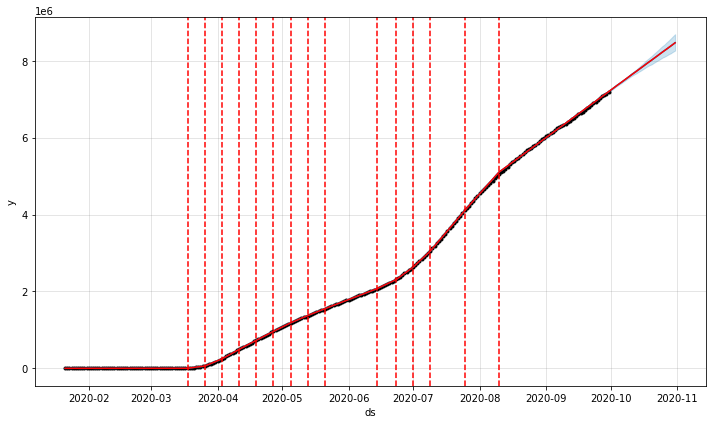

In [35]:
from fbprophet.plot import add_changepoints_to_plot

# This particular feature helps us identify trend changes that are infered by the model

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


MINI CHALLENGE #6: 
- Try to perform forecast for the next 60 days instead of 30 days

In [36]:
future = m.make_future_dataframe(periods = 120)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)




In [ ]:
#from fbprophet.plot import add_changepoints_to_plot

# This particular feature helps us identify trend changes that are infered by the model

#fig = m.plot(forecast)
#a = add_changepoints_to_plot(fig.gca(), m, forecast)

# TASK #8: ASSESS THE PERFORMANCE OF THE MODEL

In [ ]:
# Access the performance of the model

score = r2_score(test['y'], forecast[forecast['ds'] >= '2020-10-01']['trend'])

print('R-Sqaure score is {}'.format(score))

R-Sqaure score is 0.7804513848008419


In [ ]:
# Add the predicted values to the original dataframe for plotting purpose

US_df['predicted'] = forecast['trend']


In [ ]:
US_df

ds          y     predicted
0    2020-01-21        1.0  5.021731e+01
1    2020-01-22        1.0  5.082164e+01
2    2020-01-23        1.0  5.142598e+01
3    2020-01-24        1.0  5.203031e+01
4    2020-01-25        2.0  5.263465e+01
..          ...        ...           ...
280  2020-10-27  8704524.0  8.302851e+06
281  2020-10-28  8779653.0  8.343885e+06
282  2020-10-29  8858024.0  8.384919e+06
283  2020-10-30  8946154.0  8.425952e+06
284  2020-10-31  9047427.0  8.466986e+06

[285 rows x 3 columns]

In [ ]:
# Function to plot the forecast and the origianl values for comparison

def interactive_plot_forecasting(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['ds'],y = df[i], name = i)
    fig.show()

In [ ]:
interactive_plot_forecasting(US_df, 'Original Vs Predicted')

# GREAT JOB!

# MINI CHALLENGES SOLUTION

MINI CHALLENGE #1 SOLTUON:
- Print the first and last 10 rows in the dataframe. 
- How many samples exist in the dataframe?

In [ ]:
covid_df.head(10)

In [ ]:
covid_df.tail(10)

In [ ]:
len(covid_df)

MINI CHALLENGE #2 SOLUTION:
- Sort the DataFrame by 'Class'

In [ ]:
covid_df = covid_df.sort_values(by = 'Cases')
covid_df

MINI CHALLENGE #3 SOLUTION:
- Plot the number of deaths for all countries

In [ ]:
# Plot interactive chart
interactive_plot(covid_df, 'Deaths', 'Number of Deaths')

MINI CHALLENGE #4 SOLUTION:
- Animate the number of cases plot based on Dates instead of months

In [ ]:
fig = px.choropleth(covid_df, locations = "iso_alpha", #locations iso code
                    color = 'Daily tests', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'Date') # timeframe for animation
fig.show()

MINI CHALLENGE #5 SOLUTION:
- Obtain the data for 'Canada' instead of 'United States'

In [ ]:
canada = covid_df[covid_df['Entity'] == 'Canada']  
canada

In [ ]:
canada = canada[['Date','Cases']]
canada.reset_index(inplace = True, drop = True)
canada

MINI CHALLENGE #6 SOLUTION: 
- Try to perform forecast for the next 60 days instead of 30 days

In [ ]:
future = m.make_future_dataframe(periods=60)
# Make prediction 
forecast = m.predict(future)
# Ploting the forecasted data
plot_plotly(m, forecast)